In [30]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

(x_train, x_valid) = X_train[5000:], X_train[:5000] 
(y_train, y_valid) = Y_train[5000:], Y_train[:5000]

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
optim = tensorflow.keras.optimizers.SGD(lr=0.001, momentum=0.975, decay=2e-06)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=250, verbose=1)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Train Accuracy: {test_results[1]}%')


model.fit(X_test, Y_test, epochs=50, batch_size=250, verbose=1)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Test Accuracy: {test_results[1]}%')


model.fit(x_valid, y_valid, epochs=50, batch_size=250, verbose=1)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {loss} - Validation Accuracy: {acc}%')

Feature shape: (784,)
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


240/240 [==============================] - 1s 3ms/step - loss: 1.2809 - accuracy: 0.6018
Epoch 2/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.8778
Epoch 3/50
240/240 [==============================] - 1s 3ms/step - loss: 0.3286 - accuracy: 0.9076
Epoch 4/50
240/240 [==============================] - 1s 3ms/step - loss: 0.2846 - accuracy: 0.9195
Epoch 5/50
240/240 [==============================] - 1s 3ms/step - loss: 0.2554 - accuracy: 0.9276
Epoch 6/50
240/240 [==============================] - 1s 3ms/step - loss: 0.2313 - accuracy: 0.9347
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 0.2113 - accuracy: 0.9405
Epoch 8/50
240/240 [==============================] - 1s 3ms/step - loss: 0.1957 - accuracy: 0.9447
Epoch 9/50
240/240 [==============================] - 1s 3ms/step - loss: 0.1803 - accuracy: 0.9489
Epoch 10/50
240/240 [==============================] - 1s 3ms/step - loss: 0.1677 - accuracy: 0.9524
Epoch 11/5

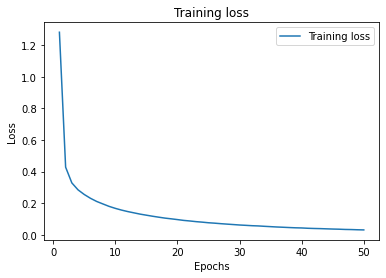

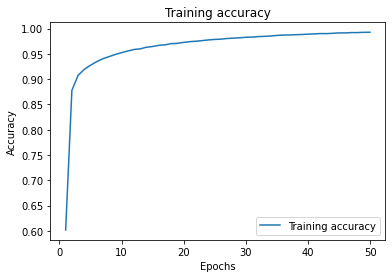

In [31]:
epochs = range(1,51)
loss1 = history.history['loss']
plt.plot(epochs, loss1, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


epochs = range(1,51)
acc = history.history['accuracy']
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

(x_train, x_valid) = X_train[5000:], X_train[:5000] 
(y_train, y_valid) = Y_train[5000:], Y_train[:5000]

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
optim = tensorflow.keras.optimizers.SGD(lr=0.001, momentum=0.975, decay=2e-06)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Train Accuracy: {test_results[1]}%')


model.fit(X_test, Y_test, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Test Accuracy: {test_results[1]}%')

model.fit(x_valid, y_valid, epochs=50, batch_size=250, verbose=1)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Validation Accuracy: {test_results[1]}%')

Feature shape: (784,)
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


192/192 [==============================] - 1s 6ms/step - loss: 1.3721 - accuracy: 0.6101 - val_loss: 0.5407 - val_accuracy: 0.8508
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 0.4486 - accuracy: 0.8730 - val_loss: 0.3516 - val_accuracy: 0.9005
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 0.3444 - accuracy: 0.9025 - val_loss: 0.2961 - val_accuracy: 0.9162
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2982 - accuracy: 0.9149 - val_loss: 0.2656 - val_accuracy: 0.9242
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2697 - accuracy: 0.9224 - val_loss: 0.2467 - val_accuracy: 0.9315
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2455 - accuracy: 0.9295 - val_loss: 0.2262 - val_accuracy: 0.9384
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2268 - accuracy: 0.9350 - val_loss: 0.2107 - val_accuracy: 0.9411
Epoch 8/50
192/19

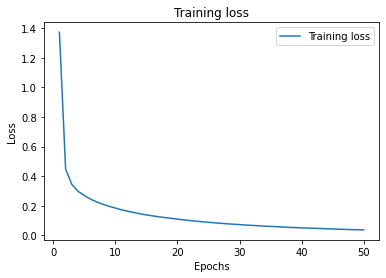

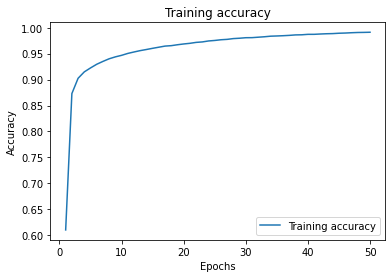

In [33]:
epochs = range(1,51)
loss2 = history.history['loss']
plt.plot(epochs, loss2, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


epochs = range(1,51)
acc = history.history['accuracy']
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

(x_train, x_valid) = X_train[5000:], X_train[:5000] 
(y_train, y_valid) = Y_train[5000:], Y_train[:5000]

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
optim = tensorflow.keras.optimizers.SGD(lr=0.001, momentum=0.975, decay=2e-06)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Train Accuracy: {test_results[1]}%')


model.fit(X_test, Y_test, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Test Accuracy: {test_results[1]}%')

model.fit(x_valid, y_valid, epochs=50, batch_size=250, verbose=1)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Validation Accuracy: {test_results[1]}%')

Feature shape: (784,)
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


192/192 [==============================] - 1s 5ms/step - loss: 1.2158 - accuracy: 0.6701 - val_loss: 0.4585 - val_accuracy: 0.8709
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 0.4054 - accuracy: 0.8852 - val_loss: 0.3328 - val_accuracy: 0.9070
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 0.3295 - accuracy: 0.9066 - val_loss: 0.2920 - val_accuracy: 0.9171
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2922 - accuracy: 0.9168 - val_loss: 0.2648 - val_accuracy: 0.9247
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2656 - accuracy: 0.9241 - val_loss: 0.2455 - val_accuracy: 0.9303
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2448 - accuracy: 0.9305 - val_loss: 0.2297 - val_accuracy: 0.9367
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2266 - accuracy: 0.9353 - val_loss: 0.2149 - val_accuracy: 0.9404
Epoch 8/50
192/19

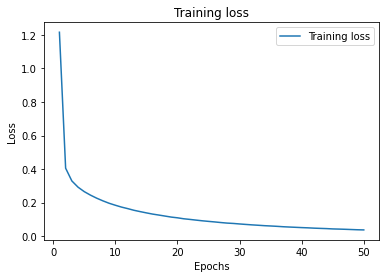

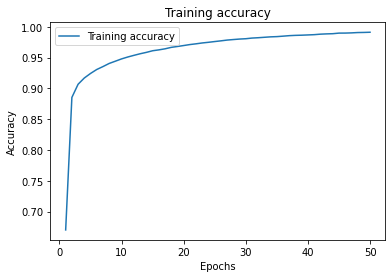

In [35]:
epochs = range(1,51)
loss3 = history.history['loss']
plt.plot(epochs, loss3, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


epochs = range(1,51)
acc = history.history['accuracy']
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

(x_train, x_valid) = X_train[5000:], X_train[:5000] 
(y_train, y_valid) = Y_train[5000:], Y_train[:5000]

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
optim = tensorflow.keras.optimizers.SGD(lr=0.001, momentum=0.975, decay=2e-06)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Train Accuracy: {test_results[1]}%')


model.fit(X_test, Y_test, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Test Accuracy: {test_results[1]}%')

model.fit(x_valid, y_valid, epochs=50, batch_size=250, verbose=1)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Validation Accuracy: {test_results[1]}%')

Feature shape: (784,)
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


192/192 [==============================] - 1s 5ms/step - loss: 1.2734 - accuracy: 0.6512 - val_loss: 0.4582 - val_accuracy: 0.8727
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 0.4031 - accuracy: 0.8854 - val_loss: 0.3279 - val_accuracy: 0.9073
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 0.3258 - accuracy: 0.9054 - val_loss: 0.2850 - val_accuracy: 0.9187
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2896 - accuracy: 0.9175 - val_loss: 0.2620 - val_accuracy: 0.9254
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2629 - accuracy: 0.9259 - val_loss: 0.2400 - val_accuracy: 0.9317
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2430 - accuracy: 0.9317 - val_loss: 0.2280 - val_accuracy: 0.9339
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.2254 - accuracy: 0.9365 - val_loss: 0.2111 - val_accuracy: 0.9412
Epoch 8/50
192/19

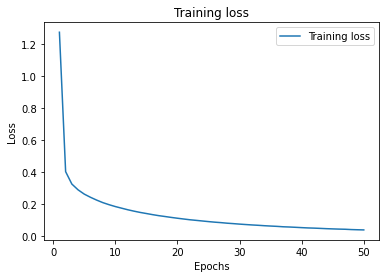

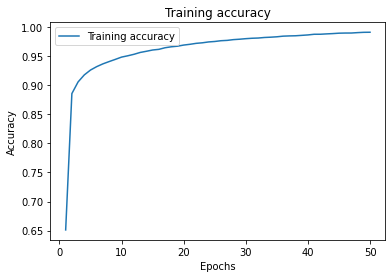

In [37]:
epochs = range(1,51)
loss4 = history.history['loss']
plt.plot(epochs, loss4, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


epochs = range(1,51)
acc = history.history['accuracy']
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Train Accuracy: {test_results[1]}%')


model.fit(X_test, Y_test, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Test Accuracy: {test_results[1]}%')

Feature shape: (784,)
Epoch 1/50
192/192 [==============================] - 1s 4ms/step - loss: 0.3433 - accuracy: 0.9036 - val_loss: 0.1593 - val_accuracy: 0.9561
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 0.1290 - accuracy: 0.9620 - val_loss: 0.1154 - val_accuracy: 0.9660
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0842 - accuracy: 0.9748 - val_loss: 0.0947 - val_accuracy: 0.9711
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0647 - accuracy: 0.9801 - val_loss: 0.0822 - val_accuracy: 0.9765
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0428 - accuracy: 0.9874 - val_loss: 0.0822 - val_accuracy: 0.9754
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0319 - accuracy: 0.9909 - val_loss: 0.0847 - val_accuracy: 0.9763
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0261 - accuracy: 0.9926 - val_loss: 0.0809 - val_a

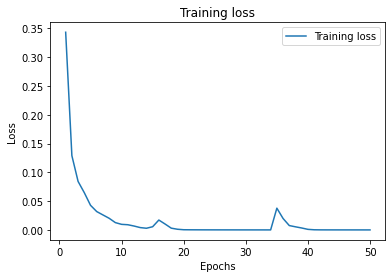

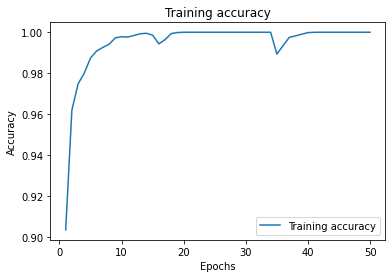

In [39]:
epochs = range(1,51)
loss = history.history['loss']
plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


epochs = range(1,51)
acc = history.history['accuracy']
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Train Accuracy: {test_results[1]}%')


model.fit(X_test, Y_test, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Test Accuracy: {test_results[1]}%')

Feature shape: (784,)
Epoch 1/50
192/192 [==============================] - 1s 5ms/step - loss: 0.3472 - accuracy: 0.8965 - val_loss: 0.1637 - val_accuracy: 0.9517
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 0.1351 - accuracy: 0.9592 - val_loss: 0.1179 - val_accuracy: 0.9656
Epoch 3/50
192/192 [==============================] - 1s 5ms/step - loss: 0.0862 - accuracy: 0.9741 - val_loss: 0.0971 - val_accuracy: 0.9714
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.0891 - val_accuracy: 0.9735
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0884 - val_accuracy: 0.9744
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0972 - val_accuracy: 0.9728
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0872 - val_a

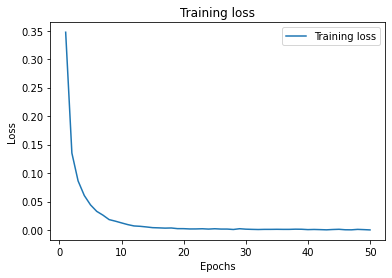

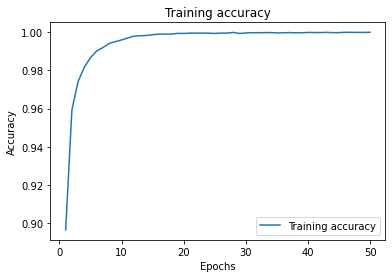

In [41]:
epochs = range(1,51)
loss = history.history['loss']
plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


epochs = range(1,51)
acc = history.history['accuracy']
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Train Accuracy: {test_results[1]}%')


model.fit(X_test, Y_test, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Test Accuracy: {test_results[1]}%')

Feature shape: (784,)
Epoch 1/50
192/192 [==============================] - 1s 5ms/step - loss: 2.1012 - accuracy: 0.3465 - val_loss: 1.8808 - val_accuracy: 0.5816
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 1.6806 - accuracy: 0.6656 - val_loss: 1.4554 - val_accuracy: 0.7406
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 1.2992 - accuracy: 0.7650 - val_loss: 1.1155 - val_accuracy: 0.8065
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 1.0261 - accuracy: 0.8055 - val_loss: 0.8919 - val_accuracy: 0.8330
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 0.8499 - accuracy: 0.8282 - val_loss: 0.7492 - val_accuracy: 0.8500
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.7346 - accuracy: 0.8426 - val_loss: 0.6539 - val_accuracy: 0.8611
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.6555 - accuracy: 0.8529 - val_loss: 0.5880 - val_a

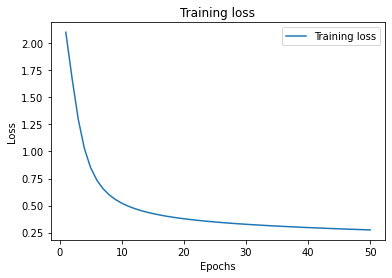

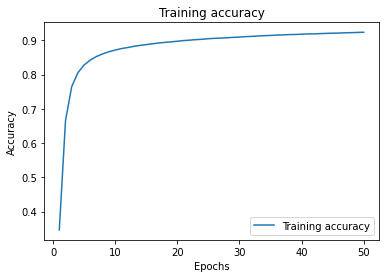

In [43]:
epochs = range(1,51)
loss = history.history['loss']
plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


epochs = range(1,51)
acc = history.history['accuracy']
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Train Accuracy: {test_results[1]}%')


model.fit(X_test, Y_test, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Test Accuracy: {test_results[1]}%')

Feature shape: (784,)
Epoch 1/50
192/192 [==============================] - 1s 5ms/step - loss: 0.3458 - accuracy: 0.9037 - val_loss: 0.1578 - val_accuracy: 0.9530
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 0.1306 - accuracy: 0.9612 - val_loss: 0.1231 - val_accuracy: 0.9630
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0848 - accuracy: 0.9751 - val_loss: 0.0988 - val_accuracy: 0.9688
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0617 - accuracy: 0.9811 - val_loss: 0.1034 - val_accuracy: 0.9682
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0893 - val_accuracy: 0.9748
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0319 - accuracy: 0.9906 - val_loss: 0.0885 - val_accuracy: 0.9732
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0248 - accuracy: 0.9927 - val_loss: 0.0840 - val_a

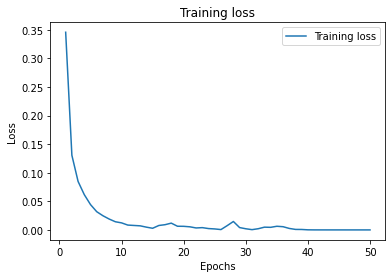

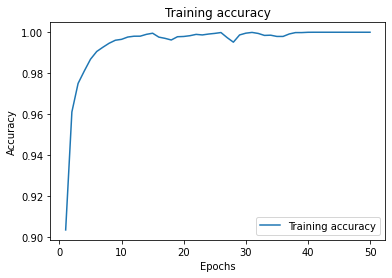

In [45]:
epochs = range(1,51)
loss = history.history['loss']
plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


epochs = range(1,51)
acc = history.history['accuracy']
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Train Accuracy: {test_results[1]}%')


history = model.fit(X_test, Y_test, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Test Accuracy: {test_results[1]}%')

Feature shape: (784,)
Epoch 1/10
192/192 [==============================] - 1s 5ms/step - loss: 0.3566 - accuracy: 0.8999 - val_loss: 0.1609 - val_accuracy: 0.9530
Epoch 2/10
192/192 [==============================] - 1s 4ms/step - loss: 0.1310 - accuracy: 0.9614 - val_loss: 0.1216 - val_accuracy: 0.9637
Epoch 3/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0869 - accuracy: 0.9741 - val_loss: 0.0958 - val_accuracy: 0.9718
Epoch 4/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0608 - accuracy: 0.9821 - val_loss: 0.0852 - val_accuracy: 0.9746
Epoch 5/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0446 - accuracy: 0.9867 - val_loss: 0.0878 - val_accuracy: 0.9736
Epoch 6/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9900 - val_loss: 0.0834 - val_accuracy: 0.9757
Epoch 7/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0239 - accuracy: 0.9931 - val_loss: 0.0782 - val_a

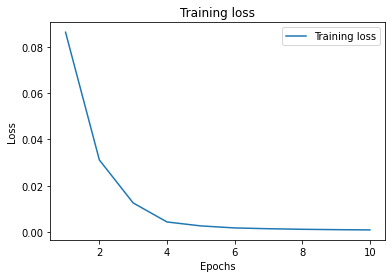

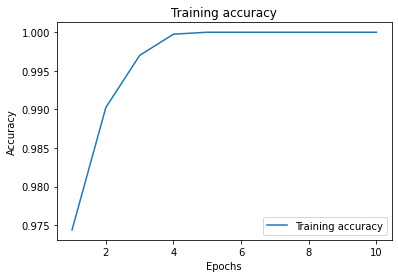

In [47]:
epochs = range(1,11)
loss = history.history['loss']
plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


epochs = range(1,11)
acc = history.history['accuracy']
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

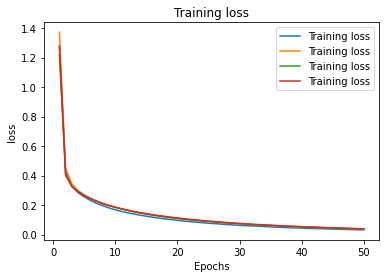

In [48]:
epochs = range(1,51)
plt.plot(epochs, loss1, label='Training loss')
plt.plot(epochs, loss2, label='Training loss')
plt.plot(epochs, loss3, label='Training loss')
plt.plot(epochs, loss4, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()